In [1]:
import datetime as DT
import io
import numpy as np
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
players=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\players.json')
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


In [3]:
#Dropping unnecessary columns
players_imp=players.drop(columns=['passportArea','weight','firstName','middleName','lastName','currentTeamId','height','role','birthArea','wyId','foot','currentNationalTeamId'])
players_imp
players_shortname=players_imp.drop(columns=['birthDate'])
players_shortname

,shortName
0,H. Tekin
1,M. Sarr
2,O. Mandanda
3,A. N'Diaye
4,I. Konat\u00e9
...,...
3598,A. Ma\u00e2loul
3599,C. C\u00e1ceda
3600,M. Araujo
3601,A. Tagnaouti


In [4]:
players_imp

,birthDate,shortName
0,1989-06-17,H. Tekin
1,1999-01-23,M. Sarr
2,1998-10-26,O. Mandanda
3,1990-03-06,A. N'Diaye
4,1999-05-25,I. Konat\u00e9
...,...,...
3598,1990-01-01,A. Ma\u00e2loul
3599,1991-09-27,C. C\u00e1ceda
3600,1994-10-24,M. Araujo
3601,1996-04-05,A. Tagnaouti


In [5]:
# calculating age of the players
import datetime as DT
players_imp['age']=pd.to_datetime(players_imp['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - players_imp['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

,age
0,30
1,20
2,21
3,29
4,20
...,...
3598,29
3599,28
3600,25
3601,23


In [6]:
players_age=pd.concat([players_shortname,age],axis=1)
players_age

,shortName,age
0,H. Tekin,30
1,M. Sarr,20
2,O. Mandanda,21
3,A. N'Diaye,29
4,I. Konat\u00e9,20
...,...,...
3598,A. Ma\u00e2loul,29
3599,C. C\u00e1ceda,28
3600,M. Araujo,25
3601,A. Tagnaouti,23


#### Calculating the median age of the players

In [7]:
med_age=players_age.age.median()
med_age

27.0

#### Boxplot visualization

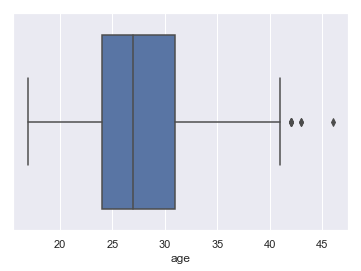

In [8]:
sns.set(style="darkgrid")
boxplot = sns.boxplot(x="age", data=players_age)
boxplot

#### Frequency of players with different ages

In [9]:
table_freq=players_age.groupby('age').size()
#table-freq=table_freq.reset_index(drop=True)
df= pd.DataFrame(table_freq)
serial_no=list(range(14))
df=df.reset_index()
df.columns=['age','frequency']
df.head()

,age,frequency
0,17,3
1,18,19
2,19,64
3,20,150
4,21,188


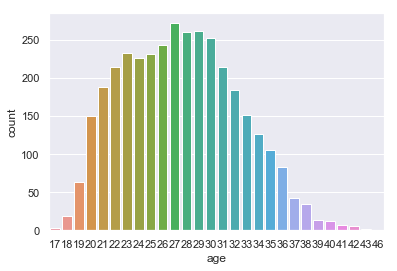

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age", data=players_age)
plt.show()

In [11]:
player_eff=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\final_player_ratio.json')
player_eff


,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1989-03-02,36,T. Alderweireld,598,0.665924,898
1,1987-04-24,48,J. Vertonghen,1129,0.476371,2370
2,1992-02-14,54,C. Eriksen,869,0.395719,2196
3,1993-07-28,8717,H. Kane,246,0.414141,594
4,1990-09-19,8945,K. Trippier,601,0.458429,1311
...,...,...,...,...,...,...
236,1988-07-11,25798,E. Capoue,196,0.236429,829
237,1991-02-02,3351,Kiko Femen\u00eda,547,0.649644,842
238,1989-07-22,160,D. Janmaat,161,0.195864,822
239,1989-08-12,7929,T. Cleverley,830,0.767808,1081


In [12]:
player_ex_dob=player_eff.drop(columns=['birthDate'])
player_ex_dob

,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,36,T. Alderweireld,598,0.665924,898
1,48,J. Vertonghen,1129,0.476371,2370
2,54,C. Eriksen,869,0.395719,2196
3,8717,H. Kane,246,0.414141,594
4,8945,K. Trippier,601,0.458429,1311
...,...,...,...,...,...
236,25798,E. Capoue,196,0.236429,829
237,3351,Kiko Femen\u00eda,547,0.649644,842
238,160,D. Janmaat,161,0.195864,822
239,7929,T. Cleverley,830,0.767808,1081


In [13]:
player_eff['age'] = pd.to_datetime(player_eff['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - player_eff['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

,age
0,30
1,32
2,27
3,26
4,29
...,...
236,31
237,28
238,30
239,30


In [14]:
players_age_eff=pd.concat([player_ex_dob,age],axis=1).drop(columns=['Efficiency'])
players_age_eff

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
0,36,T. Alderweireld,598,898,30
1,48,J. Vertonghen,1129,2370,32
2,54,C. Eriksen,869,2196,27
3,8717,H. Kane,246,594,26
4,8945,K. Trippier,601,1311,29
...,...,...,...,...,...
236,25798,E. Capoue,196,829,31
237,3351,Kiko Femen\u00eda,547,842,28
238,160,D. Janmaat,161,822,30
239,7929,T. Cleverley,830,1081,30


# Research Question: Does age group influence acuracy:

#### dividing the player with respect to the age groups

In [15]:
# Age group 20.5-25.5
table1= players_age_eff.query('20.5<=age<=25.5')
table1.head()

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
6,210044,E. Dier,1073,2147,25
7,13484,D. Alli,451,1184,23
11,240070,H. Winks,568,628,23
12,257762,D. S\u00e1nchez,617,1803,23
46,247248,S. March,336,689,25


In [16]:
# Age group 25.5-30.5
table2=players_age_eff.query('25.5<=age<=30.5')
table2

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
0,36,T. Alderweireld,598,898,30
2,54,C. Eriksen,869,2196,27
3,8717,H. Kane,246,594,26
4,8945,K. Trippier,601,1311,29
8,14911,Son Heung-Min,363,938,27
...,...,...,...,...,...
232,20593,R. Pereyra,248,682,28
237,3351,Kiko Femen\u00eda,547,842,28
238,160,D. Janmaat,161,822,30
239,7929,T. Cleverley,830,1081,30


In [17]:
# Age group 30.5-35.5
table3=players_age_eff.query('30.5<=age<=35.5')
table3.head()

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
1,48,J. Vertonghen,1129,2370,32
5,11152,M. Demb\u00e9l\u00e9,558,1365,32
9,25381,H. Lloris,347,815,32
18,8433,S. Ward,412,999,34
21,70092,S. Defour,684,1019,31


In [18]:
s11=table1['AccuratePassesNumber'].sum()
s12=table1['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 20.5-25.5
s13=s12-s11
#The list contains total number of inaccurate passes and inaccurate passes
L1=list([round(s11/len(table1)),round(s13/len(table1))])
L1

[401.0, 579.0]

In [19]:
s21=table2['AccuratePassesNumber'].sum()
s22=table2['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 25.5-30.5
s23=s22-s21
#The list contains total number of inaccurate passes and inaccurate passes
L2=list([round(s21/len(table2)),round(s23/len(table2))])
L2

[475.0, 633.0]

In [20]:
s31=table3['AccuratePassesNumber'].sum()
s32=table3['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 30.5-35.5
s33=s32-s31
#The list contains total number of inaccurate passes and inaccurate passes
L3=list([round(s31/len(table3)),round(s33/len(table3))])
L3

[551.0, 617.0]

In [21]:
table=[L1,L2,L3]
table

[[401.0, 579.0], [475.0, 633.0], [551.0, 617.0]]

In [22]:
# Generating the contingency table
data = [['20.5-25.5', *L1], ['25.5-30.5', *L2], ['30.5-35.5', *L3]] 
df_data = pd.DataFrame(data, columns = ['Age_group', 'Average accurate passes','Average inaccurate passes'])
df_data = df_data.set_index(df_data.Age_group).drop('Age_group', axis = 1)

### Chi-Squared Test 
A chi-squared test with significance level $\alpha = 0.05$ will now be performed on the above contingency table.

H0 : The null Hypothesis is that there's no statistically significant relationship between age of the players and the efficiency of the players 

H1: The alternative hypotesis is that there's significant relationship between age of the players and the efficiency of the players.

In [23]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[429.502457  550.497543 ]
 [485.6007371 622.3992629]
 [511.8968059 656.1031941]]
probability=0.950, critical=5.991, stat=9.097
Dependent (reject H0)
significance=0.050, p=0.011
Dependent (reject H0)


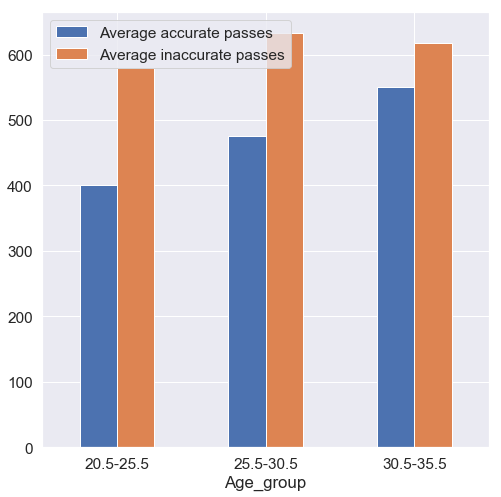

In [24]:
sns.set(font_scale=1.4)
df_data.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.xticks(rotation=0)
plt.show()

#### Consider the level of significance $\alpha$ be 0.05. From the chi square test, we observe that the p-value is 0.001. Which is indeed less than the level of significance $\alpha$. As, $p<\alpha$, we reject the null hypothesis and can claim that there is significant statistical relationship between the age of a player and his efficiency. In particular, the barplot shows that accuracy increases with age, suggesting that years of experience influence the accuracy of players.